## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\Bobson\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.layers import Dense, Dropout, Input
def build_mlp(input_shape, output_shape=10, hidden_nur =[512,256,128] , dropoutrate=0.3):
    """Code Here
    建立你的神經網路
    """
    inp = Input(input_shape)
    for i, hidden_nur_num in enumerate(hidden_nur):
        if i ==0:
            x = Dense(activation = 'relu', units = hidden_nur_num, name="hidden_layer"+str(i+1))(inp)
            x = Dropout(dropoutrate)(x)
        else:
            x = Dense(activation = 'relu', units = hidden_nur_num, name="hidden_layer"+str(i+1))(x)
            x = Dropout(dropoutrate)(x)
        output = Dense(activation = 'softmax', units = output_shape, name="output_layer")(x)
    model = keras.models.Model(inputs=[inp], outputs=[output])
    return model

In [8]:
"""Code Here
設定超參數
"""
epochs = 50
batch_size=256
dropoutrate = [0.1,0.2,0.3,0.4,0.5]
learning_rate = 0.001
momentum = 0.95

In [10]:
### HW1 ###
############################ SGD ############################################

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in dropoutrate:
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:], dropoutrate = i)
    model.summary()
    opt = keras.optimizers.SGD(lr = learning_rate, momentum = momentum , nesterov = True)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
    model.fit(x_train, y_train, shuffle =True , validation_data = (x_test, y_test) , epochs = epochs, batch_size = batch_size)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp_drop%s" % str(i)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 8s 168us/step - loss: 1.1164 - acc: 0.6010 - val_loss: 1.2746 - val_acc: 0.5479
Epoch 50/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.1069 - acc: 0.6060 - val_loss: 1.2750 - val_acc: 0.5488
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
________

Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2422 - acc: 0.5548 - val_loss: 1.2954 - val_acc: 0.5396
Epoch 49/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2391 - acc: 0.5562 - val_loss: 1.3011 - val_acc: 0.5367
Epoch 50/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.2299 - acc: 0.5626 - val_loss: 1.2967 - val_acc: 0.5344
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               

50000/50000 [==============================] - 8s 152us/step - loss: 1.3700 - acc: 0.5101 - val_loss: 1.3467 - val_acc: 0.5180
Epoch 47/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.3639 - acc: 0.5121 - val_loss: 1.3422 - val_acc: 0.5176
Epoch 48/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.3583 - acc: 0.5157 - val_loss: 1.3422 - val_acc: 0.5176
Epoch 49/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.3468 - acc: 0.5176 - val_loss: 1.3336 - val_acc: 0.5227
Epoch 50/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.3412 - acc: 0.5205 - val_loss: 1.3484 - val_acc: 0.5138
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)             

Epoch 45/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.4901 - acc: 0.4676 - val_loss: 1.4054 - val_acc: 0.4974
Epoch 46/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.4827 - acc: 0.4687 - val_loss: 1.4038 - val_acc: 0.4975
Epoch 47/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4815 - acc: 0.4708 - val_loss: 1.4005 - val_acc: 0.4996
Epoch 48/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.4740 - acc: 0.4735 - val_loss: 1.3933 - val_acc: 0.5061
Epoch 49/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.4709 - acc: 0.4741 - val_loss: 1.3943 - val_acc: 0.5019
Epoch 50/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4630 - acc: 0.4775 - val_loss: 1.3817 - val_acc: 0.5076
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None

50000/50000 [==============================] - 8s 154us/step - loss: 1.6177 - acc: 0.4185 - val_loss: 1.4968 - val_acc: 0.4693
Epoch 44/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6174 - acc: 0.4207 - val_loss: 1.4893 - val_acc: 0.4696
Epoch 45/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6126 - acc: 0.4225 - val_loss: 1.4951 - val_acc: 0.4674
Epoch 46/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6119 - acc: 0.4218 - val_loss: 1.4809 - val_acc: 0.4723
Epoch 47/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6042 - acc: 0.4259 - val_loss: 1.4916 - val_acc: 0.4624
Epoch 48/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6046 - acc: 0.4251 - val_loss: 1.4807 - val_acc: 0.4746
Epoch 49/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6046 - acc: 0.4243 - val_loss: 1.4779 - val_acc: 0.4747
Epoch 50/50
50000/50000 [==============

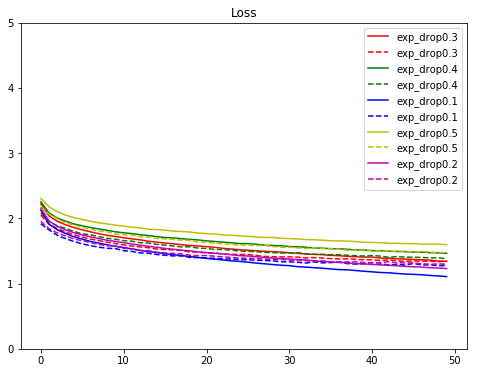

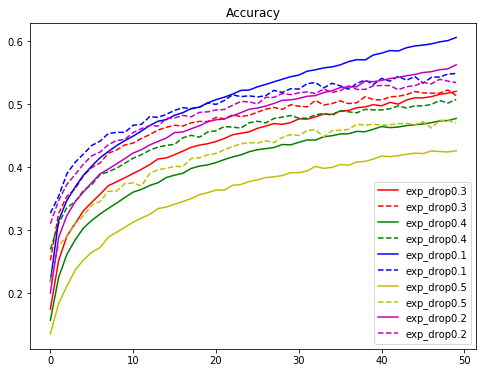

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("SGD_Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("SGD_Accuracy")
plt.legend()
plt.show()

In [12]:
### HW2 ###
############ ADAM #################################

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in dropoutrate:
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:], dropoutrate = i)
    model.summary()
    opt = keras.optimizers.Adam(lr = learning_rate)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
    model.fit(x_train, y_train, shuffle =True , validation_data = (x_test, y_test) , epochs = epochs, batch_size = batch_size)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp_drop%s" % str(i)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 10s 192us/step - loss: 1.1507 - acc: 0.5868 - val_loss: 1.3368 - val_acc: 0.5272
Epoch 50/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.1463 - acc: 0.5874 - val_loss: 1.3503 - val_acc: 0.5268
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
______

50000/50000 [==============================] - 9s 188us/step - loss: 1.3882 - acc: 0.5010 - val_loss: 1.3997 - val_acc: 0.4994
Epoch 48/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.3943 - acc: 0.4982 - val_loss: 1.3964 - val_acc: 0.5043
Epoch 49/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.3837 - acc: 0.5041 - val_loss: 1.4100 - val_acc: 0.5021
Epoch 50/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.3813 - acc: 0.5046 - val_loss: 1.4187 - val_acc: 0.4996
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0    

50000/50000 [==============================] - 10s 190us/step - loss: 1.5747 - acc: 0.4358 - val_loss: 1.5109 - val_acc: 0.4756
Epoch 46/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5717 - acc: 0.4361 - val_loss: 1.5183 - val_acc: 0.4682
Epoch 47/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.5721 - acc: 0.4331 - val_loss: 1.5151 - val_acc: 0.4596
Epoch 48/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5751 - acc: 0.4368 - val_loss: 1.5405 - val_acc: 0.4577
Epoch 49/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5660 - acc: 0.4384 - val_loss: 1.5265 - val_acc: 0.4636
Epoch 50/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.5635 - acc: 0.4380 - val_loss: 1.5263 - val_acc: 0.4635
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)    

50000/50000 [==============================] - 10s 194us/step - loss: 1.7321 - acc: 0.3692 - val_loss: 1.6948 - val_acc: 0.4121
Epoch 44/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.7296 - acc: 0.3717 - val_loss: 1.7138 - val_acc: 0.4072
Epoch 45/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.7243 - acc: 0.3731 - val_loss: 1.7142 - val_acc: 0.4051
Epoch 46/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.7277 - acc: 0.3709 - val_loss: 1.7084 - val_acc: 0.4145
Epoch 47/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.7272 - acc: 0.3721 - val_loss: 1.7068 - val_acc: 0.4109
Epoch 48/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.7264 - acc: 0.3714 - val_loss: 1.7005 - val_acc: 0.4142
Epoch 49/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.7228 - acc: 0.3765 - val_loss: 1.6755 - val_acc: 0.4224
Epoch 50/50
50000/50000 [=========

50000/50000 [==============================] - 9s 190us/step - loss: 1.9280 - acc: 0.2797 - val_loss: 2.0213 - val_acc: 0.2703
Epoch 42/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.9252 - acc: 0.2826 - val_loss: 1.9976 - val_acc: 0.2760
Epoch 43/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.9231 - acc: 0.2832 - val_loss: 1.9473 - val_acc: 0.3007
Epoch 44/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.9196 - acc: 0.2842 - val_loss: 2.0422 - val_acc: 0.2570
Epoch 45/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.9222 - acc: 0.2821 - val_loss: 2.0220 - val_acc: 0.2918
Epoch 46/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.9244 - acc: 0.2826 - val_loss: 1.9689 - val_acc: 0.2992
Epoch 47/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.9203 - acc: 0.2871 - val_loss: 2.0032 - val_acc: 0.2905
Epoch 48/50
50000/50000 [=============

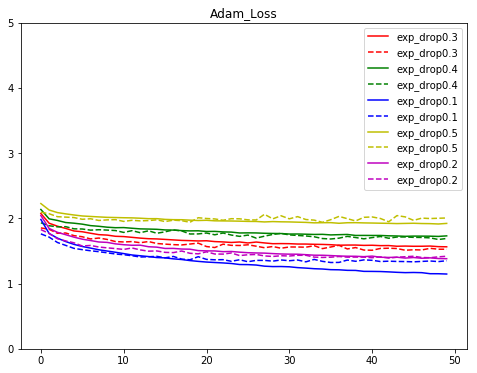

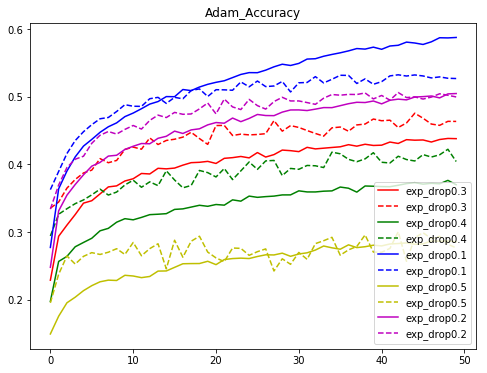

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Adam_Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Adam_Accuracy")
plt.legend()
plt.show()